<a href="https://colab.research.google.com/github/martinpius/Applied-Predictive-Modeling2/blob/master/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
try:
  drive.mount("/content/drive", force_remount = True)
  COLAB = True
  import tensorflow
  print(f'You are on Google Colab with tensorflow version {tensorflow.__version__}')
except:
  COLAB = False
  pass

Mounted at /content/drive
You are on Google Colab with tensorflow version 2.3.0


In [2]:
def time_setter(x):
  hours = int(x/(60 *60))
  minutes = int(x%(60 *60)/60)
  seconds = int(x%60)
  return f"{hours}:{minutes:>02}: {seconds:>05.2f}"
  

In [3]:
import numpy as np
import pandas as pd
import time
import os
import tensorflow.keras
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Activation, LSTM,Embedding, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import math


In [4]:
def sigmoid_fn(x):
  s = []
  for i in x:
    s.append(1/(1+np.exp(-i)))
  return s


def hypertan(x):
  s = []
  for i in x:
    s.append(np.tanh(i))
  return s

In [5]:
x = np.arange(-10., 10., 0.2)

In [6]:
y1 = sigmoid_fn(x)
y2 = hypertan(x)

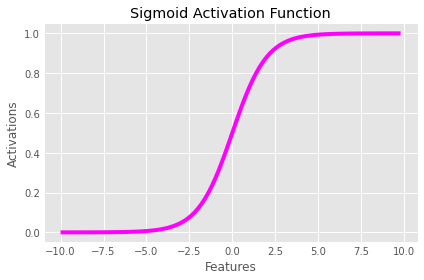

In [7]:
plt.style.use('ggplot')
plt.plot(x, y1, color = 'magenta')
plt.xlabel('Features')
plt.ylabel('Activations')
plt.title('Sigmoid Activation Function')
plt.tight_layout()

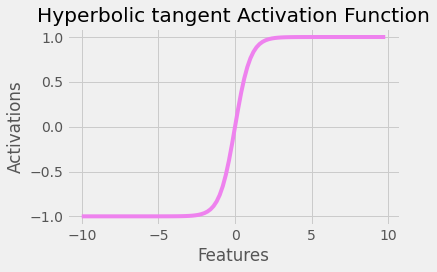

In [8]:
plt.style.use("fivethirtyeight")
plt.plot(x, y2, color = 'violet')
plt.xlabel("Features")
plt.ylabel('Activations')
plt.title('Hyperbolic tangent Activation Function')
plt.tight_layout()

In [9]:
x = [
     [[0],[0],[0],[2],[2],[0],[0]],
     [[1],[1],[1],[0],[0],[0],[0]],
     [[0],[0],[0],[4],[4],[0],[0]],
     [[1],[1],[0],[1],[0],[0],[0]],
     [[0],[2],[0],[2],[2],[0],[0]],
     [[3],[3],[0],[0],[3],[0],[0]]
]

In [10]:
x = np.array(x, dtype = np.float32)

In [11]:
y = np.array([2,1,4,1,2,3], dtype = np.int32)

In [12]:
#Create dummies for the response
y1 = np.zeros((y.shape[0],5), dtype = np.int32)

In [13]:
y1[np.arange(y.shape[0]),y] = 1

In [14]:
y1

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=int32)

In [15]:
x

array([[[0.],
        [0.],
        [0.],
        [2.],
        [2.],
        [0.],
        [0.]],

       [[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [4.],
        [4.],
        [0.],
        [0.]],

       [[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [2.],
        [0.],
        [2.],
        [2.],
        [0.],
        [0.]],

       [[3.],
        [3.],
        [0.],
        [0.],
        [3.],
        [0.],
        [0.]]], dtype=float32)

In [16]:
#Building the simple LSTM model
model = Sequential()
model.add(LSTM(units = 256, kernel_initializer = 'random_normal',dropout = 0.2, recurrent_dropout = 0.2, input_shape = (None,1)))
model.add(Dense(units = 5, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
info = EarlyStopping(monitor = 'val_loss', verbose = 0, patience = 100,restore_best_weights = True,min_delta=1e-3, mode = 'auto')
model.fit(x, y1, epochs = 1000, callbacks = [info], verbose = 0)

In [17]:
pred = model.predict(x)
pred = np.argmax(pred, axis = 1)
expected1 = np.argmax(y1, axis = 1)
print(f"Predicted-->{pred}\n Expected-->{expected1}")

Predicted-->[2 1 4 1 2 3]
 Expected-->[2 1 4 1 2 3]


In [18]:
def myfn(model, new_data):
  new_data = np.array(new_data, dtype = np.float32)
  preds = model.predict(new_data)
  return f"Predicted values: {np.argmax(preds, axis = 1)}"

In [19]:
myfn(model, np.array([[[0],[3],[1],[0],[1],[1]]]))

'Predicted values: [3]'

In [20]:
if COLAB:
  path = "/content/drive/My Drive/"
else:
  pass

In [21]:
data_path = os.path.join(path, 'SN_d_tot_V2.0.csv')
names = ['year', 'month','day','dec_year','sn_value','sn_error','obs_num']
mydata = pd.read_csv(data_path, sep = ';', header = None, names = names,na_values = ['-1'],index_col=False)

In [22]:
mydata.tail()

,year,month,day,dec_year,sn_value,sn_error,obs_num
74048,2020,9,26,2020.736,0,0.0,29
74049,2020,9,27,2020.739,0,0.0,26
74050,2020,9,28,2020.742,0,0.0,20
74051,2020,9,29,2020.745,0,0.0,30
74052,2020,9,30,2020.747,0,0.0,31


In [23]:
display(mydata[0:10])

,year,month,day,dec_year,sn_value,sn_error,obs_num
0,1818,1,1,1818.001,-1,NaN,0
1,1818,1,2,1818.004,-1,NaN,0
2,1818,1,3,1818.007,-1,NaN,0
3,1818,1,4,1818.010,-1,NaN,0
4,1818,1,5,1818.012,-1,NaN,0
5,1818,1,6,1818.015,-1,NaN,0
6,1818,1,7,1818.018,-1,NaN,0
7,1818,1,8,1818.021,65,10.2,1
8,1818,1,9,1818.023,-1,NaN,0
9,1818,1,10,1818.026,-1,NaN,0


In [24]:
clean_id = max(mydata[mydata['obs_num']==0].index.tolist())+ 1

In [25]:
print(clean_id)

11314


In [26]:
mydata = mydata[clean_id:] #filter the missing entries

In [27]:
display(mydata.head())

,year,month,day,dec_year,sn_value,sn_error,obs_num
11314,1848,12,23,1848.977,353,23.8,1
11315,1848,12,24,1848.980,240,19.6,1
11316,1848,12,25,1848.982,275,21.0,1
11317,1848,12,26,1848.985,352,23.8,1
11318,1848,12,27,1848.988,268,20.8,1


In [28]:
#Convert the sn_values into float
mydata['sn_value'] = mydata['sn_value'].astype(float)

In [29]:
#Spliting the data into training and testing set
mydata_train = mydata[mydata['year']<2000]
mydata_test = mydata[mydata['year']>=2000]

In [30]:
mydata_test.shape

(7579, 7)

In [31]:
mydata_train.shape

(55160, 7)

In [32]:
train_sports = mydata_train['sn_value'].tolist()
test_sports = mydata_test['sn_value'].tolist()

In [33]:
train_sports[1:10]

[240.0, 275.0, 352.0, 268.0, 285.0, 343.0, 340.0, 238.0, 287.0]

In [34]:
test_sports[1:10]

[75.0, 80.0, 95.0, 108.0, 126.0, 126.0, 111.0, 112.0, 96.0]

In [36]:
#slicing the data into sequences
def to_sequence(seq_size, obs):
  x = []
  y = []
  for i in range(len(obs)-SEQ_SIZE):
    slice_patch = obs[i:(i+SEQ_SIZE)]
    left_over = obs[i+SEQ_SIZE]
    slice_patch = [[x] for x in slice_patch]
    x.append(slice_patch)
    y.append(left_over)
  return np.array(x), np.array(y)

In [37]:
#Splits the data
SEQ_SIZE = 5
x_train, y_train = to_sequence(SEQ_SIZE, train_sports)
x_test, y_test = to_sequence(SEQ_SIZE,test_sports)

In [39]:
print(f"train_shape: {x_train.shape}\ntrain_label_shape: {y_train.shape}\n test_shape: {x_test.shape}\ntest_label_shape: {y_test.shape}")

train_shape: (55155, 5, 1)
train_label_shape: (55155,)
 test_shape: (7574, 5, 1)
test_label_shape: (7574,)


In [42]:
#Building the LSTM
model = Sequential()
model.add(LSTM(units = 512, kernel_initializer = 'random_normal',dropout=0.2,recurrent_dropout = 0.2,
               input_shape = (None, 1)))
model.add(Dense(128, kernel_initializer='random_normal', activation = 'relu'))
model.add(Dense(64, kernel_initializer = 'random_normal', activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')
info = EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 10, min_delta = 1e-3, restore_best_weights = True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 1000, verbose = 2, callbacks = [info])

Epoch 1/1000
1724/1724 - 30s - loss: 786.5702 - val_loss: 615.1942
Epoch 2/1000
1724/1724 - 29s - loss: 562.7989 - val_loss: 345.3052
Epoch 3/1000
1724/1724 - 30s - loss: 553.8766 - val_loss: 589.0817
Epoch 4/1000
1724/1724 - 30s - loss: 551.3297 - val_loss: 413.4389
Epoch 5/1000
1724/1724 - 30s - loss: 543.6339 - val_loss: 685.0961
Epoch 6/1000
1724/1724 - 30s - loss: 542.0644 - val_loss: 573.7175
Epoch 7/1000
1724/1724 - 29s - loss: 539.1716 - val_loss: 606.7512
Epoch 8/1000
1724/1724 - 30s - loss: 541.4363 - val_loss: 489.4453
Epoch 9/1000
1724/1724 - 29s - loss: 536.8287 - val_loss: 440.0357
Epoch 10/1000
1724/1724 - 29s - loss: 541.2823 - val_loss: 350.9869
Epoch 11/1000
1724/1724 - 29s - loss: 536.6111 - val_loss: 338.2273
Epoch 12/1000
1724/1724 - 29s - loss: 537.8625 - val_loss: 532.4745
Epoch 13/1000
1724/1724 - 29s - loss: 535.5770 - val_loss: 454.9409
Epoch 14/1000
1724/1724 - 29s - loss: 533.3467 - val_loss: 425.8847
Epoch 15/1000
1724/1724 - 29s - loss: 530.2749 - val_loss

In [44]:
pred = model.predict(x_test)

In [45]:
mse = np.sqrt(metrics.mean_squared_error(pred, y_test))

In [46]:
mse

17.111083919890866

In [1]:
#Word embedding

In [41]:
my_sentences = [
             'The dog is running on the playground',
             'My nose is bleeding badly',
             'The cat is sniffing',
             'I like her eyes',
             'A bottle of honey is in the fridge',
             'A tray of eggs',
             'I love good rock musics']

In [42]:
my_sentences


['The dog is running on the playground',
 'My nose is bleeding badly',
 'The cat is sniffing',
 'I like her eyes',
 'A bottle of honey is in the fridge',
 'A tray of eggs',
 'I love good rock musics']

In [6]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding,Activation
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd


In [44]:
size_voc = 10000

In [45]:
#Get the one_hot representation for each word in the corpus
my_one_hot = [one_hot(word, size_voc) for word in my_sentences]#This return the indices of each word in the dictionary of 10000 words

In [46]:
print(my_one_hot)

[[7098, 144, 2207, 1826, 4781, 7098, 4819], [1092, 8062, 2207, 5681, 8441], [7098, 429, 2207, 3335], [6320, 4293, 8171, 4520], [8284, 8401, 7061, 8232, 2207, 2977, 7098, 2326], [8284, 8239, 7061, 257], [6320, 4620, 6244, 3730, 9213]]


In [48]:
#Zero-padding the sentences to create equality in the dimension.
#The longest sentence has 8 words. We may take 10 as maximum length for padding
len_max = 10
padded_doc = pad_sequences(my_one_hot, padding = 'pre', maxlen = len_max)

In [49]:
print(padded_doc)

[[   0    0    0 7098  144 2207 1826 4781 7098 4819]
 [   0    0    0    0    0 1092 8062 2207 5681 8441]
 [   0    0    0    0    0    0 7098  429 2207 3335]
 [   0    0    0    0    0    0 6320 4293 8171 4520]
 [   0    0 8284 8401 7061 8232 2207 2977 7098 2326]
 [   0    0    0    0    0    0 8284 8239 7061  257]
 [   0    0    0    0    0 6320 4620 6244 3730 9213]]


In [50]:
model = Sequential()
model.add(Embedding(input_dim =size_voc, output_dim =10,input_length= len_max))

In [51]:
model.compile('Adam', 'mse')

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 10)            100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [53]:
print(model.predict(padded_doc))

[[[ 0.01388177  0.00260422 -0.04101703 -0.04777248  0.01455886
   -0.01963545  0.04333192 -0.00274371 -0.00228704 -0.03348263]
  [ 0.01388177  0.00260422 -0.04101703 -0.04777248  0.01455886
   -0.01963545  0.04333192 -0.00274371 -0.00228704 -0.03348263]
  [ 0.01388177  0.00260422 -0.04101703 -0.04777248  0.01455886
   -0.01963545  0.04333192 -0.00274371 -0.00228704 -0.03348263]
  [ 0.00753815 -0.03045371 -0.01331175 -0.02398941 -0.01916808
    0.03235594  0.02901128  0.01985082 -0.00139959 -0.04116138]
  [-0.02918736 -0.04866592  0.02160517  0.03591026 -0.02749504
    0.01987768 -0.01031642 -0.01436989 -0.02312099  0.03751213]
  [-0.01818167 -0.02888906 -0.02575786 -0.02164089  0.01097841
    0.04923462  0.04398313  0.00024239  0.03492416 -0.04518199]
  [ 0.04806038  0.01008847  0.04458436  0.00887156  0.01959014
   -0.01356655  0.00558303  0.03402029  0.00673865 -0.00666256]
  [ 0.02851608  0.03397658 -0.01967469  0.02077094  0.01644896
   -0.02194334  0.02128858  0.02851376 -0.019704

In [54]:
#APP LSTM

In [16]:
#Predicting fake news using word Embedding
#Loading the dataset

if COLAB==True:
  mypath = "/content/drive/My Drive/fake-news"
else:
  pass


In [17]:
train_path = "/content/drive/My Drive/fake-news/train.csv"
test_path = "/content/drive/My Drive/fake-news/test.csv"
submit_path = "/content/drive/My Drive/fake-news/submit.csv"

In [18]:
train = pd.read_csv(train_path, na_values = ['NA','?'])
test = pd.read_csv(test_path, na_values = ['NA', '?'])
submit = pd.read_csv(submit_path)

In [19]:
display(train.head(10))

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [20]:
display(test.head(10))

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?


In [21]:
train.shape

(20800, 5)

In [22]:
train.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [23]:
train = train.dropna(axis = 0)

In [24]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [26]:
train.isna().value_counts()

id     title  author  text   label
False  False  False   False  False    18285
dtype: int64

In [28]:
x = train.drop(['label'], axis = 1)
y = train['label']

In [29]:
x.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [30]:
display(x.shape)

(18285, 4)

In [31]:
display(y.shape)

(18285,)

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Activation, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.text import one_hot

In [33]:
#Preprocess the data
news = x.copy()
news['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [34]:
news.reset_index(inplace = True)

In [35]:
news.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [37]:
#Text processing libraries
import nltk
import re
from nltk .corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pst = PorterStemmer()
my_corpus = []
for i in range(0, len(news)):
  print(i)
  review = re.sub('[^a-zA-Z]', ' ',news['title'][i] )
  review = review.lower()
  review = review.split()
  review = [pst.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  my_corpus.append(review)

In [40]:
size_voc = 5000


In [41]:
display(my_corpus)

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [43]:
#Convert to one_hot vectors
corpus_one_hot = [one_hot(word, size_voc) for word in my_corpus]

In [45]:
display(corpus_one_hot[0])

[115, 2871, 730, 4811, 3976, 2176, 2626, 590, 819, 2498]

In [46]:
#Padding the corpus to have same legth list of vocabularies
padded_corpus = pad_sequences(corpus_one_hot, maxlen = 20, padding = 'pre')

In [47]:
display(padded_corpus)

array([[   0,    0,    0, ...,  590,  819, 2498],
       [   0,    0,    0, ...,  466, 1104, 1697],
       [   0,    0,    0, ...,  514, 1894, 3812],
       ...,
       [   0,    0,    0, ...,   62, 4758,  661],
       [   0,    0,    0, ..., 4835, 4796, 1295],
       [   0,    0,    0, ...,  344, 2008, 2737]], dtype=int32)

In [49]:
#Building an LSTM using words embedding
max_features = 50
model = Sequential()
model.add(Embedding(input_dim =size_voc,output_dim=max_features,input_length= 20))
model.add(LSTM(units = 128, recurrent_dropout=0.2, dropout= 0.25))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics =['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 50)            250000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 349,969
Trainable params: 349,969
Non-trainable params: 0
_________________________________________________________________


In [50]:
display(len(padded_corpus))

18285

In [51]:
#Converting the training set into numpy array
x1 = np.array(padded_corpus)
y1 = np.array(y)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.1, random_state = 123)

In [54]:
#Train the LSTM model
info = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 50, verbose = 1, restore_best_weights = True, mode='auto')
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10000, verbose = 2, callbacks = [info])

Epoch 1/10000
515/515 - 36s - loss: 0.2450 - accuracy: 0.8918 - val_loss: 0.1801 - val_accuracy: 0.9273
Epoch 2/10000
515/515 - 36s - loss: 0.1341 - accuracy: 0.9479 - val_loss: 0.1970 - val_accuracy: 0.9202
Epoch 3/10000
515/515 - 36s - loss: 0.0916 - accuracy: 0.9666 - val_loss: 0.2172 - val_accuracy: 0.9267
Epoch 4/10000
515/515 - 37s - loss: 0.0618 - accuracy: 0.9790 - val_loss: 0.2609 - val_accuracy: 0.9196
Epoch 5/10000
515/515 - 36s - loss: 0.0451 - accuracy: 0.9844 - val_loss: 0.3015 - val_accuracy: 0.9169
Epoch 6/10000
515/515 - 36s - loss: 0.0332 - accuracy: 0.9885 - val_loss: 0.3362 - val_accuracy: 0.9147
Epoch 7/10000
515/515 - 36s - loss: 0.0234 - accuracy: 0.9918 - val_loss: 0.4232 - val_accuracy: 0.9131
Epoch 8/10000
515/515 - 36s - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.5179 - val_accuracy: 0.8978
Epoch 9/10000
515/515 - 36s - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.5240 - val_accuracy: 0.9185
Epoch 10/10000
515/515 - 36s - loss: 0.0117 - accuracy: 0.9957 -

In [63]:
pred = model.predict_classes(x_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [64]:

#expected = np.argmax(y_test, axis = 1)
ac_score = metrics.accuracy_score(y_test, pred)

In [65]:
ac_score

0.9272826681246583